In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality-prediction/Water Quality Prediction.csv


In [2]:
df =pd.read_csv('/kaggle/input/water-quality-prediction/Water Quality Prediction.csv')

In [3]:
df

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,8.350000e-05,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,2.010586e-02,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,1.439878e-01,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,8.186428,1.977157e-02,5.968850,115.963429,1.590000e-113,2.277221,Near Colorless,0.020610,1.194165,...,2.718928,2.603963e-02,220.571485,Stream,5.491908,43.817452,March,15.0,14.0,0
1048571,1048571,8.046225,1.160000e-05,3.678714,148.053168,5.930000e-25,0.483369,Near Colorless,0.878835,1.203689,...,2.312058,4.427830e-02,406.095969,Lake,10.143768,34.626853,December,16.0,0.0,0
1048572,1048572,7.443582,3.103077e-03,7.893399,174.677900,1.080000e-15,1.461659,Near Colorless,0.701053,0.115412,...,3.410297,2.350000e-05,439.086461,Spring,14.612881,55.460415,June,18.0,16.0,0
1048573,1048573,6.897232,6.980000e-10,5.757980,125.564223,1.300000e-18,0.804589,Near Colorless,0.156424,0.554729,...,2.803234,3.220000e-19,278.051032,Well,7.351956,65.055864,May,5.0,3.0,0


In [4]:
data =df.drop(['Month', 'Day', 'Time of Day'], axis=1)

In [5]:
data.head(5)

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,1.626212,87.266538,471.683357,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,0
1,1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,1.686049,144.010981,432.844908,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,0
2,2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,0
3,3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,NaN,147.163233,237.028468,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,0
4,4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,0


In [6]:
data.isnull().sum()

Index                         0
pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Color                       981
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Source                    15535
Water Temperature         29688
Air Temperature            5303
Target                        0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

Index                     0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Target                    0
dtype: int64

In [9]:
data['Color'].value_counts()

Colorless         230093
Near Colorless    229729
Faint Yellow      132769
Light Yellow       88161
Yellow             58396
Name: Color, dtype: int64

In [10]:
data.drop('Source', axis=1)

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Target
1,1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.020000e-07,284.641984,15.348981,71.220586,0
2,2,5.443762,2.010586e-02,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,11.643467,44.891330,0
4,4,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,15.249416,69.336671,0
7,7,7.258203,6.110000e-09,9.261676,182.242341,4.400000e-224,0.416478,Colorless,0.047803,1.016196,0.298093,3.144199,114.551427,160.062557,2.325094,6.020000e-16,214.553104,15.891905,61.139140,0
9,9,7.100650,3.019038e-03,3.620641,157.043934,6.460000e-148,0.112994,Colorless,0.050613,0.842107,0.391602,2.713379,167.417837,583.295321,2.284971,8.840000e-07,113.909077,11.899376,14.010268,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,1048569,6.957090,3.823323e-03,2.256611,142.981428,3.700000e-52,0.887256,Faint Yellow,0.159260,1.874301,0.261121,0.148123,68.833196,472.795988,3.384594,1.907230e-04,155.306913,17.146633,64.890571,0
1048570,1048570,8.186428,1.977157e-02,5.968850,115.963429,1.590000e-113,2.277221,Near Colorless,0.020610,1.194165,0.006663,3.149487,43.969084,227.409325,2.718928,2.603963e-02,220.571485,5.491908,43.817452,0
1048571,1048571,8.046225,1.160000e-05,3.678714,148.053168,5.930000e-25,0.483369,Near Colorless,0.878835,1.203689,0.171610,0.894528,74.133056,124.828663,2.312058,4.427830e-02,406.095969,10.143768,34.626853,0
1048572,1048572,7.443582,3.103077e-03,7.893399,174.677900,1.080000e-15,1.461659,Near Colorless,0.701053,0.115412,0.641379,3.150154,201.977606,337.630357,3.410297,2.350000e-05,439.086461,14.612881,55.460415,0


In [11]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object to the categorical data
le.fit(data['Color'])

# Transform the categorical data using the LabelEncoder object
data['Color'] = le.transform(data['Color'])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
X= data.drop(['Target', 'Source'], axis=1)
y = data.Target

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# we will divide the dataset into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99)

In [14]:
# check the shape again
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((591318, 19), (147830, 19), (591318,), (147830,))

In [15]:
X_train

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature
915204,915204,8.471221,3.020000e-05,7.207141,123.205653,3.580000e-07,0.459567,3,0.017657,0.141881,0.074758,2.358936,181.572967,305.229996,3.545804,5.600000e-08,158.517254,24.260647,84.927462
226099,226099,6.837886,5.530000e-07,2.940440,124.942602,2.030000e-09,0.395617,0,0.206912,0.742784,0.692644,1.218633,187.359030,737.957108,2.970150,2.040000e-06,138.846763,31.348434,71.176514
253946,253946,7.665964,4.762860e-02,9.079875,177.463203,2.450000e-71,0.397499,3,0.188579,0.669702,0.404591,1.431093,207.902483,227.491909,2.490994,3.580000e-19,175.826888,25.374431,73.691663
676248,676248,7.794102,3.197865e-01,3.659304,76.087718,4.990000e-27,3.412036,1,2.049839,2.161557,0.941968,1.040771,101.968739,344.927824,4.280023,1.781740e-01,445.353052,15.560819,63.553959
580991,580991,7.802581,9.650000e-08,6.077476,213.482225,4.250000e-31,2.571376,0,0.136933,0.123036,0.781379,2.119594,95.242675,443.521678,3.018663,2.690000e-09,191.556407,19.115251,42.259236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339449,339449,7.550498,2.340000e-06,5.763834,225.775273,2.190000e-13,0.077583,3,1.631886,0.933629,0.063623,1.812853,156.983808,503.799138,3.953711,2.145853e-02,45.057547,27.964769,49.551267
980892,980892,7.530447,8.880000e-08,7.664869,174.337012,1.980000e-131,0.156379,0,0.244687,0.659108,0.120057,2.023837,196.034689,479.048618,3.384523,1.310000e-08,404.494125,9.886372,54.478613
251836,251836,6.631242,6.516633e-02,3.119081,186.456193,1.860000e-23,1.036329,0,0.623917,1.019664,0.003551,1.312086,46.890111,313.285252,2.422124,6.860000e-09,220.946907,31.274770,46.110277
777260,777260,8.063079,9.863657e-02,14.229151,106.940496,5.910000e-294,0.547881,2,0.144801,0.131842,0.586499,3.743939,355.657993,516.605873,2.657823,4.294872e-01,65.530166,10.375665,55.589653


In [16]:
# scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [17]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [18]:
# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [19]:
# import model
model=Sequential()
# layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# build ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

In [20]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 18, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 18, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 17, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 17, 64)            0

In [21]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
%%time
# fitting the model
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
18479/18479 [==============================] - 149s 7ms/step - loss: 2.4430 - accuracy: 0.8370 - val_loss: 2.2614 - val_accuracy: 0.8509
Epoch 2/20
18479/18479 [==============================] - 139s 8ms/step - loss: 2.3492 - accuracy: 0.8452 - val_loss: 2.4311 - val_accuracy: 0.8408
Epoch 3/20
18479/18479 [==============================] - 149s 8ms/step - loss: 2.2759 - accuracy: 0.8506 - val_loss: 2.2392 - val_accuracy: 0.8534
Epoch 4/20
18479/18479 [==============================] - 149s 8ms/step - loss: 2.2632 - accuracy: 0.8516 - val_loss: 2.1066 - val_accuracy: 0.8619
Epoch 5/20
18479/18479 [==============================] - 148s 8ms/step - loss: 2.1402 - accuracy: 0.8598 - val_loss: 2.1418 - val_accuracy: 0.8598
Epoch 6/20
18479/18479 [==============================] - 149s 8ms/step - loss: 2.1095 - accuracy: 0.8618 - val_loss: 1.9801 - val_accuracy: 0.8704
Epoch 7/20
18479/18479 [==============================] - 144s 8ms/step - loss: 2.0600 - accuracy: 0.8650 - val_

In [23]:
# plot
import matplotlib.pyplot as plt
def plot_learningcurve(history,epochs):
  epoch=range(1,epochs+1)
  # accuracyplot_learningcurve(history,20)
  plt.plot(epoch, history.history['accuracy'])
  plt.plot(epoch, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, history.history['loss'])
  plt.plot(epoch, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

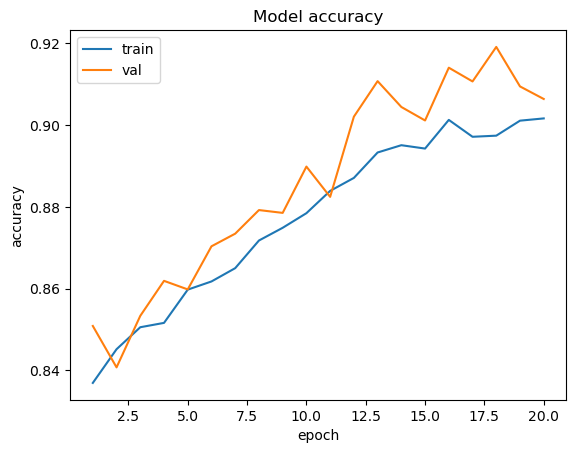

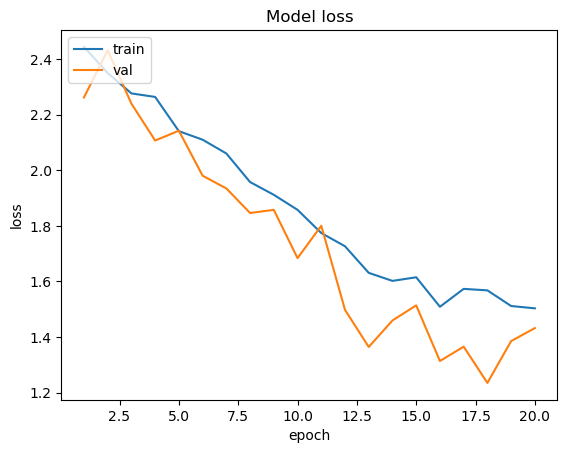

In [24]:
plot_learningcurve(history,20)